# Programming for Data Science and Artificial Intelligence

## Workshop 0 - Loan Prediction

In this workshop we will be working on a dataset called the Loan Prediction dataset.

This dataset concern the data of loan application and the result whether if the loan was approved or not.

We are given 2 set, the training set and the test set.

The training set contains 614 samples and 13 features, 12 of which are the independent variables and the last feature `Loan_Status` is the dependent variable.

The test set contains 367 samples with the same 12 features but without the `Loan_Status` columns. So it will be representing the unseen data that we will be implementing our model on.

Our goal is to do analyze the data to understand this problem and create a classification model for predicting the `Loan_Status`

The first thing to do is to clean the data, by filling in missing values and converting categorical data to real numbers. We will use the Python libraries pandas and sklearn to help with the data cleaning and preparation.

Our tasks will be divided into 2 parts

1. Exploratory Data Analysis
    * Load and view the Dataset
    * Are there any null values ? How will you wrangle/handle them?
    * Are there any outliers values ? How will you wrangle/handle them?
    * Do you notice any patterns or anomalies in the data? Can you plot them?
2. Statistical Analysis
    * Training a machine learning model for Loan prediction

# 1) Exploratory Data Analysis

* Load and view the dataset
* Are there any null values or outliers? How will you wrangle/handle them?
* Do you notice any patterns or anomalies in the data? Can you plot them?

## 1.1) Load and view the Dataset

In [1]:
# Import Pandas
import pandas as pd


# Import the 2 dataset from these paths
# 'data/test_LoanPrediction.csv'
# 'data/test_LoanPrediction.csv'
train_data = pd.read_csv('data/train_LoanPrediction.csv')
test_data  = pd.read_csv('data/test_LoanPrediction.csv')

In [2]:
# Check the shape of Training and Test set
print('Training data shape : ', train_data.shape)
print('Test data shape     : ', test_data.shape)

Training data shape :  (614, 13)
Test data shape     :  (367, 12)


In [3]:
# Let's see the "head" of the training set
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# Let's see the "info" of the training set
# Notice that this will tell us the  Non-null counts and the dtypes of each colum
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## 1.2) Are there any null values? How will you handle them?

In [5]:
# Let's check for missing values in the Training and Test set again with isnull()
print('Missing values in Train data : \n', train_data.isnull().sum() )
print("="*30)
print('Missing values in Test data : \n', test_data.isnull().sum() )

Missing values in Train data : 
 Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Missing values in Test data : 
 Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


### Filling categorical values


Let's first focus on the `Married` column. We can see from the table above that the `Married` has 3 missing values in the training set and 0 missing values in the test set so let's fill the training set!

We will use the distribution over the train dataset then fill in the missing values in approximately the same ratio with fillna()

Here are the steps:

   * Compute ratio of each category value in the training set
   * Divide the missing values based on ratio
   * Fill in the missing values according to the ratio
   * Don't forget to print the values before and after filling the missing values for confirmation

In [6]:
# Count the values in 'Married' columns.
print(train_data['Married'].value_counts())

Yes    398
No     213
Name: Married, dtype: int64


In [7]:
# Compute ratio of each category value in the training set
married = train_data['Married'].value_counts()

ratio_married = married[0] / sum(married.values)
ratio_not_married = married[1] / sum(married.values)

print('Numner of unique elements in Married variable : ', married.shape)
print('Ratio of Married to all     : ', ratio_married)
print('Ratio of Not Married to all : ', ratio_not_married)

Numner of unique elements in Married variable :  (2,)
Ratio of Married to all     :  0.6513911620294599
Ratio of Not Married to all :  0.3486088379705401


In [8]:
# Divide the missing values based on ratio
yes_num_train = round(ratio_married * train_data['Married'].isnull().sum())
no_num_train  = round(ratio_not_married * train_data['Married'].isnull().sum())

In [9]:
# Fill in the missing values according to the ratio
# Hint : use the parameter called 'limit' in fillna()
train_data['Married'].fillna('Yes', inplace = True, limit = yes_num_train)
train_data['Married'].fillna('No', inplace = True, limit = no_num_train)  

# Check if all missing data were filled
print(train_data['Married'].value_counts()) 
print('Missing values in Train data : \n', train_data.isnull().sum() )
print("="*30)
print('Missing values in Test data : \n', test_data.isnull().sum() )

Yes    400
No     214
Name: Married, dtype: int64
Missing values in Train data : 
 Loan_ID               0
Gender               13
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Missing values in Test data : 
 Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


Now the number of missing values in the `Married` attribute is 0. We have successfully filled the `Married` column!

But we still have to fill the following categorical columns :
        
        - Gender
        - Dependents
        - Self_Employed
        - Loan_Amount_Term
        - Credit_History
        
For some of them we need to fill in both the training and test set!

So let's write a function that can calculate the ratio from the training data and fill the missing values accordingly.
* Notice that we will use the distribution from the TRAINING set to fill in both the training and test set!

In [10]:
# Your function here
def fill_data_with_ratio(train_data, fill_data_1, fill_data_2, column_name):
    
    count_column = train_data[column_name].value_counts()
    value_list = list(count_column.index)
    
    limits_1 = []
    limits_2 = []
    
    for value in value_list:
        ratio = count_column[value] / sum(count_column.values)
        limits_1.append(round(ratio * fill_data_1[column_name].isnull().sum()))
        if any(fill_data_2):
            limits_2.append(round(ratio * fill_data_2[column_name].isnull().sum()))
    
    for id_, limit in enumerate(limits_1):
        if limit == 0 :
            limit = 1
        fill_data_1[column_name].fillna(value_list[id_], inplace = True, limit = limit)
        
    if any(fill_data_2):
        for id_, limit in enumerate(limits_2):
            if limit == 0 :
                limit = 1
            fill_data_2[column_name].fillna(value_list[id_], inplace = True, limit = limit)

In [11]:
# Let's use our function with the 'Gender' column !
# This columm has missing values in both the training and test set.

# Count the values of 'Gender' Before filling
print("========== BEFORE ==========")
print(train_data['Gender'].value_counts())
print(test_data['Gender'].value_counts())

fill_data_with_ratio(train_data, train_data, test_data, 'Gender')

# Count the values of 'Gender' after filling
print("========== AFTER ==========")
print(train_data['Gender'].value_counts())
print(test_data['Gender'].value_counts())

========== BEFORE ==========
Male      489
Female    112
Name: Gender, dtype: int64
Male      286
Female     70
Name: Gender, dtype: int64
========== AFTER ==========
Male      500
Female    114
Name: Gender, dtype: int64
Male      295
Female     72
Name: Gender, dtype: int64


#### Repeat this step for all categorical columns

In [12]:
# Let's use our function to fill the 'Dependents' column !
# This columm has missing values in both the training and test set.

# Count the values of 'Dependents' Before filling
print("========== BEFORE ==========")
print(train_data['Dependents'].value_counts())
print(test_data['Dependents'].value_counts())

# Use your finction here
fill_data_with_ratio(train_data, train_data, test_data, 'Dependents')

# Count the values of 'Dependents' after filling
print("========== AFTER ==========")
print(train_data['Dependents'].value_counts())
print(test_data['Dependents'].value_counts())

========== BEFORE ==========
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
0     200
2      59
1      58
3+     40
Name: Dependents, dtype: int64
========== AFTER ==========
0     354
1     105
2     104
3+     51
Name: Dependents, dtype: int64
0     206
2      61
1      60
3+     40
Name: Dependents, dtype: int64


In [13]:
# Notice that we have value 0, 1, 2 ,3+
# Let's convert category value "3+" to "4"
# so that we can convert them to int and it will be easier for the model later

# 'replace' value '3+' with '4'
train_data['Dependents'].replace('3+', '4', inplace = True)
test_data['Dependents'].replace('3+', '4', inplace = True)

# Notice that the values are still of type string, we will fix this later!

In [14]:
# Let's use our function with the 'Self_Employed' column !
# This columm also has missing values in both the training and test set.

# Count the values of 'Self_Employed' Before filling
print("========== BEFORE ==========")
print(train_data['Self_Employed'].value_counts())
print(test_data['Self_Employed'].value_counts())

fill_data_with_ratio(train_data, train_data, test_data, 'Self_Employed')

# Count the values of 'Self_Employed' after filling
print("========== AFTER ==========")
print(train_data['Self_Employed'].value_counts())
print(test_data['Self_Employed'].value_counts())

========== BEFORE ==========
No     500
Yes     82
Name: Self_Employed, dtype: int64
No     307
Yes     37
Name: Self_Employed, dtype: int64
========== AFTER ==========
No     527
Yes     87
Name: Self_Employed, dtype: int64
No     327
Yes     40
Name: Self_Employed, dtype: int64


In [15]:
# Let's use our function with the 'Loan_Amount_Term' column !
# This columm also has missing values in both the training and test set.

# Count the values of 'Loan_Amount_Term' Before filling
print("========== BEFORE ==========")
print(train_data['Loan_Amount_Term'].value_counts())
print(test_data['Loan_Amount_Term'].value_counts())

fill_data_with_ratio(train_data, train_data, test_data, 'Loan_Amount_Term')

# Count the values of 'Loan_Amount_Term' after filling
print("========== AFTER ==========")
print(train_data['Loan_Amount_Term'].value_counts())
print(test_data['Loan_Amount_Term'].value_counts())

========== BEFORE ==========
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
360.0    311
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
60.0       1
12.0       1
350.0      1
36.0       1
120.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64
========== AFTER ==========
360.0    524
180.0     45
480.0     16
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
360.0    316
180.0     23
480.0      8
300.0      7
240.0      4
84.0       3
60.0       1
12.0       1
350.0      1
36.0       1
120.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64


In [16]:
# Let's use our function with the 'Credit_History' column !
# This columm also has missing values in both the training and test set.

# Count the values of 'Credit_History' Before filling
print("========== BEFORE ==========")
print(train_data['Credit_History'].value_counts())
print(test_data['Credit_History'].value_counts())

fill_data_with_ratio(train_data, train_data, test_data, 'Credit_History')

# Count the values of 'Credit_History' after filling
print("========== AFTER ==========")
print(train_data['Credit_History'].value_counts())
print(test_data['Credit_History'].value_counts())

========== BEFORE ==========
1.0    475
0.0     89
Name: Credit_History, dtype: int64
1.0    279
0.0     59
Name: Credit_History, dtype: int64
========== AFTER ==========
1.0    517
0.0     97
Name: Credit_History, dtype: int64
1.0    303
0.0     64
Name: Credit_History, dtype: int64


### Filling Numerical Values
Finally, `LoanAmount` still has some missing values.
This column contains numeric attribute.
We should check the distribution of the data before deciding how to fill them.

<Figure size 576x288 with 0 Axes>

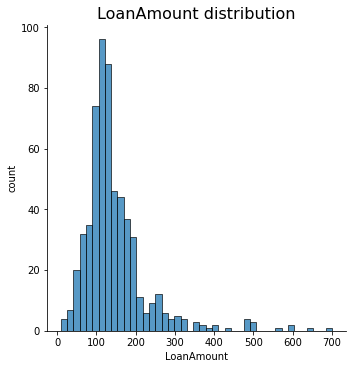

In [17]:
# plot a histogram to see the data distribution of 'LoanAmount'

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.displot(train_data['LoanAmount'])
plt.title('LoanAmount distribution', size=16)
plt.ylabel('count');

<AxesSubplot:>

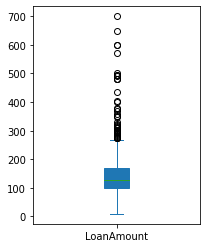

In [18]:
# also try plot a box plot
train_data['LoanAmount'].plot(kind='box', figsize=(3,4), patch_artist=True)

There are some outliers so we will be using the median over the training set to fill the missing values to avoid effects of outliers on the center value.

In [19]:
# Use the median of the Training set to fill both the training and test set.
train_data['LoanAmount'].fillna((train_data['LoanAmount'].median()), inplace=True)
test_data['LoanAmount'].fillna((train_data['LoanAmount'].median()), inplace=True)

In [20]:
# check null values in every column again, there shoul be no missing data left now
print('Missing values in Train data : \n', train_data.isnull().sum() )
print("="*30)
print('Missing values in Test data : \n', test_data.isnull().sum() )

Missing values in Train data : 
 Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
Missing values in Test data : 
 Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


## 1.3) Are there any outlier ? How will you handle them?

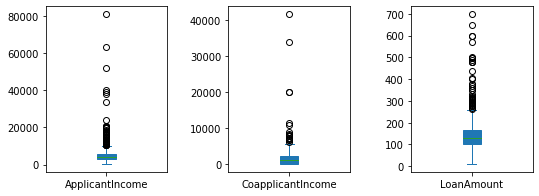

In [21]:
# Check the outliers of all numerical columns 

# select columns to plot
import numpy as np
df_to_plot = train_data.drop(columns=['Loan_ID','Loan_Amount_Term','Credit_History']).select_dtypes(include=np.number)

# make a subplot out of df_to_plot and plot the box plots
df_to_plot.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14), patch_artist=True)
plt.subplots_adjust(wspace=0.5);

#### Multiple features contain outliers, but the nothing indicate data entry errors.

## 1.4) Do you notice any patterns or anomalies in the data? Can you plot them?

### Distribution Plots for categorical data
Let's do distribution plot to see how many people in each category applied for the loan.

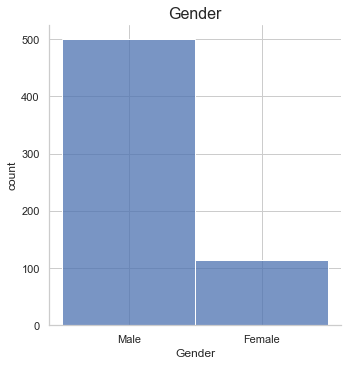

In [22]:
# import seaborn
import seaborn as sns
sns.set_theme(style="whitegrid")

# plot a distribution plot of 'Gender'
sns.displot(train_data['Gender'])
plt.title('Gender', size=16)
plt.ylabel('count');

Text(5.960000000000001, 0.5, 'count')

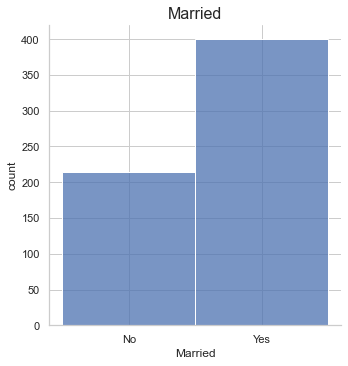

In [23]:
# plot a distribution plot of 'Married'
sns.displot(train_data['Married'])
plt.title('Married', size=16)
plt.ylabel('count')

Text(6.085000000000001, 0.5, 'count')

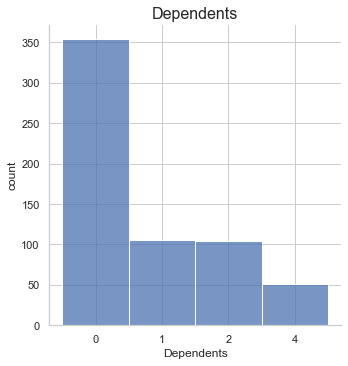

In [24]:
# plot a distribution plot of 'Dependents'
sns.displot(train_data['Dependents'])
plt.title('Dependents', size=16)
plt.ylabel('count')

Text(5.960000000000001, 0.5, 'count')

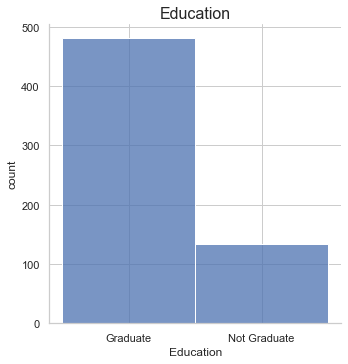

In [25]:
# plot a distribution plot of 'Education'
sns.displot(train_data['Education'])
plt.title('Education', size=16)
plt.ylabel('count')

Text(5.960000000000001, 0.5, 'count')

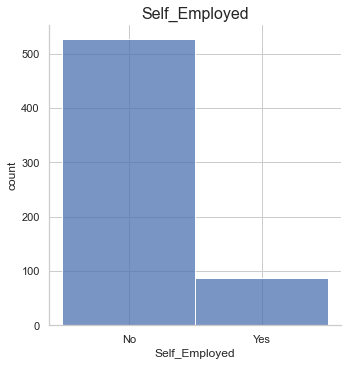

In [26]:
# plot a distribution plot of 'Self_Employed'
sns.displot(train_data['Self_Employed'])
plt.title('Self_Employed', size=16)
plt.ylabel('count')

Text(5.960000000000001, 0.5, 'count')

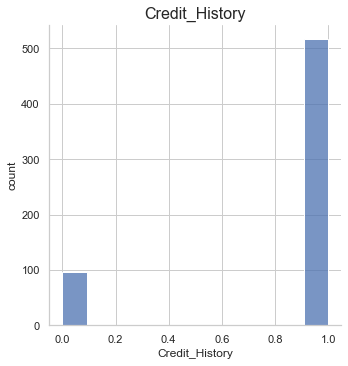

In [27]:
# plot a distribution plot of 'Credit_History'
sns.displot(train_data['Credit_History'])
plt.title('Credit_History', size=16)
plt.ylabel('count')

Text(6.085000000000001, 0.5, 'count')

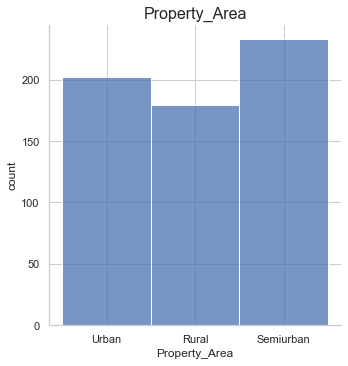

In [28]:
# plot a distribution plot of 'Property_Area'
sns.displot(train_data['Property_Area'])
plt.title('Property_Area', size=16)
plt.ylabel('count')

### Distribution Plots for Numerical Data

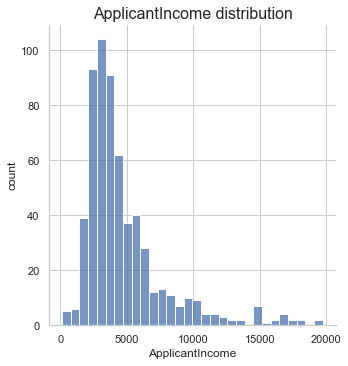

In [29]:
# plot a distribution plot of 'ApplicantIncome'
sns.displot(train_data[train_data['ApplicantIncome']<20000]['ApplicantIncome'])
plt.title('ApplicantIncome distribution', size=16)
plt.ylabel('count');

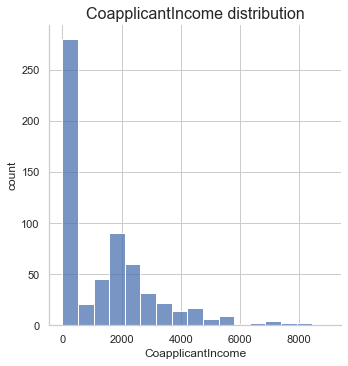

In [30]:
# plot a distribution plot of 'CoapplicantIncome'
sns.displot(train_data[train_data['CoapplicantIncome']<10000]['CoapplicantIncome'])
plt.title('CoapplicantIncome distribution', size=16)
plt.ylabel('count');

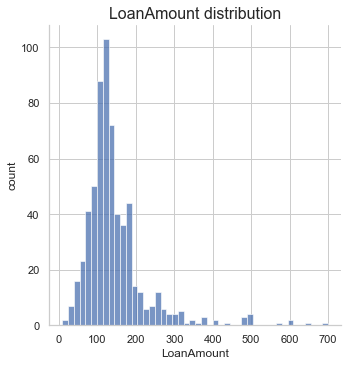

In [31]:
# plot a distribution plot of 'LoanAmount'
sns.displot(train_data[train_data['LoanAmount']<10000]['LoanAmount'])
plt.title('LoanAmount distribution', size=16)
plt.ylabel('count');

### Regression Model between 2 features

We can also try plotting the data and regression model between the `ApplicantIncome` and `LoanAmount`

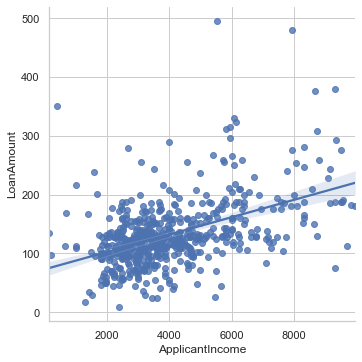

In [32]:
sns.lmplot(x='ApplicantIncome', y='LoanAmount', data=train_data[train_data['ApplicantIncome'] < 10000]);

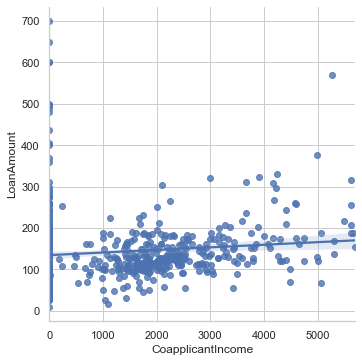

In [33]:
# Let's do the same for `CoapplicantIncome` and `LoanAmount`
sns.lmplot(x='CoapplicantIncome', y='LoanAmount', data=train_data[train_data['CoapplicantIncome'] < 6000]);

### Box Plots

Let's plot some box plots to see the relationships between some of the attributes with `LoanAmount`

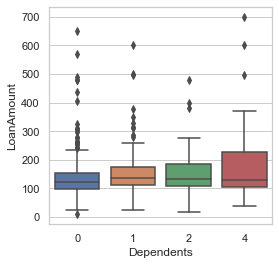

In [34]:
# Make a boxplot with x as 'Dependents' and y as 'LoanAmount'
plt.figure(figsize=(4,4))
sns.boxplot(x='Dependents', y='LoanAmount', data=train_data);

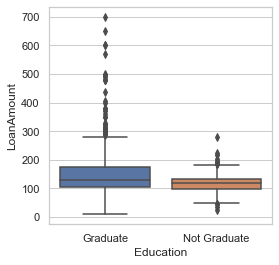

In [35]:
# Make a boxplot with x as 'Education' and y as 'LoanAmount'
plt.figure(figsize=(4,4))
sns.boxplot(x='Education', y='LoanAmount', data=train_data);

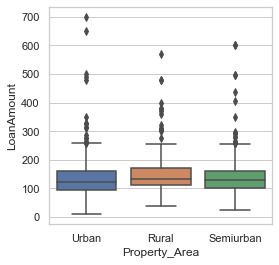

In [36]:
# Make a boxplot with x as 'Property_Area' and y as 'LoanAmount'
plt.figure(figsize=(4,4))
sns.boxplot(x='Property_Area', y='LoanAmount', data=train_data);

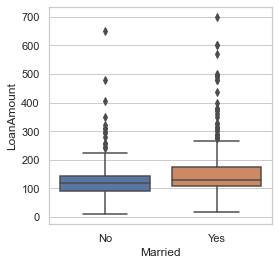

In [37]:
# Make a boxplot with x as 'Married' and y as 'LoanAmount'
plt.figure(figsize=(4,4))
sns.boxplot(x='Married', y='LoanAmount', data=train_data);

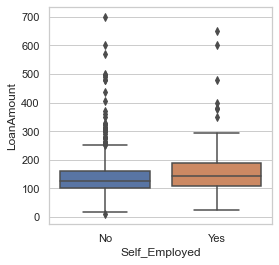

In [38]:
# Make a boxplot with x as 'Self_Employed' and y as 'LoanAmount'
plt.figure(figsize=(4,4))
sns.boxplot(x='Self_Employed', y='LoanAmount', data=train_data);

# 2) Statistical Analysis
In this workshop we will only do one type of statistical analysis
   * Training a machine learning model for Loan prediction

We will train the model to decide if we should approve or reject the loan.

The independent variables or X will be:
    
    - Gender
    - Married
    - Dependents
    - Education
    - Self_Employed
    - ApplicantIncome
    - CoapplicantIncome
    - LoanAmount
    - Loan_Amount_Term
    - Credit_History
    - Property_Area
    
These will be used to predict the dependent variable or y which is `Loan_status`

### Preparing Data for the model

First, we will convert all values to type int or float so that the model can process them, as we can see here that some columns still have `object` as dtype.

In [39]:
print(train_data.info())
print("="*50)
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #

In [40]:
# First we will drop the `Loan_ID` column as it will not help with learning of the model.
train_data.drop(columns=['Loan_ID'], inplace=True)
test_data.drop(columns=['Loan_ID'], inplace=True)

train_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


We can replace string with int.

In [41]:
# Next, let's convert the `Gender` column to 0.0 for Male and 1.0 for Female
train_data['Gender'].replace('Male', 0.0, inplace = True)
train_data['Gender'].replace('Female', 1.0, inplace = True)

test_data['Gender'].replace('Male', 0.0, inplace = True)
test_data['Gender'].replace('Female', 1.0, inplace = True)

Let's repeat this step for all of the categorical columns!

There's a lot more columns to do!
So you might want to use that 'factorize' function !
(https://pandas.pydata.org/docs/reference/api/pandas.factorize.html)

or we can just replace them.

In [42]:
# Convert values in 'Married' to int
train_married = pd.Categorical(list(train_data['Married']), categories=['No','Yes'])
test_married = pd.Categorical(list(test_data['Married']), categories=['No','Yes'])

train_codes, uniques = pd.factorize(train_married,sort=True)
train_data['Married'] = train_codes

test_codes, uniques = pd.factorize(test_married, sort=True)
test_data['Married'] = test_codes

In [43]:
# Convert values in 'Education' to int
train_education = pd.Categorical(list(train_data['Education']), categories=['Not Graduate','Graduate'])
test_education = pd.Categorical(list(test_data['Education']), categories=['Not Graduate','Graduate'])

train_codes, uniques = pd.factorize(train_education,sort=True)
train_data['Education'] = train_codes

test_codes, uniques = pd.factorize(test_education, sort=True)
test_data['Education'] = test_codes

In [44]:
# Convert values in 'Self_Employed' to int
train_selfem = pd.Categorical(list(train_data['Self_Employed']), categories=['No','Yes'])
test_selfem = pd.Categorical(list(test_data['Self_Employed']), categories=['No','Yes'])

train_codes, uniques = pd.factorize(train_selfem,sort=True)
train_data['Self_Employed'] = train_codes

test_codes, uniques = pd.factorize(test_selfem, sort=True)
test_data['Self_Employed'] = test_codes

In [45]:
# Convert values in 'Property_Area' to int
train_prop = pd.Categorical(list(train_data['Property_Area']), categories=['Rural','Semiurban','Urban'])
test_prop = pd.Categorical(list(test_data['Property_Area']), categories=['Rural','Semiurban','Urban'])

train_codes, uniques = pd.factorize(train_prop,sort=True)
train_data['Property_Area'] = train_codes

test_codes, uniques = pd.factorize(test_prop, sort=True)
test_data['Property_Area'] = test_codes

In [46]:
# Convert values in 'Loan_Status' to int
train_status = pd.Categorical(list(train_data['Loan_Status']), categories=['N','Y'])

train_codes, uniques = pd.factorize(train_status,sort=True)
train_data['Loan_Status'] = train_codes

In [47]:
# Convert values in 'Dependents' to int
train_data['Dependents'] = train_data['Dependents'].astype(int)
test_data['Dependents'] = test_data['Dependents'].astype(int)

In [48]:
# Let's see which columns are still not float or int
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    float64
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(5), int64(7)
memory usage: 57.7 KB


In [49]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             367 non-null    float64
 1   Married            367 non-null    int64  
 2   Dependents         367 non-null    int64  
 3   Education          367 non-null    int64  
 4   Self_Employed      367 non-null    int64  
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         367 non-null    float64
 8   Loan_Amount_Term   367 non-null    float64
 9   Credit_History     367 non-null    float64
 10  Property_Area      367 non-null    int64  
dtypes: float64(4), int64(7)
memory usage: 31.7 KB


#### All data is either float or int now!

## 2.1) Training a machine learning model for Loan prediction

You would want to split the train data into train and validation set first. 
Then use the training and validation set for training and validation of the model.

You can use any classification model from sklearn to classify `Loan_Status`. 
Experiment with various hyperparameters, you may use Cross-Validation, Validation curve , Learning Curve or GridSearch as you want but dont forget to get the validation accuracy and the best model.

Then, use your best model to predict `Loan_status` of the test set.
(we cannot calculate the accuracy on the test data because we don't have the ground truth (or the real values of 'Loan_Status')

### Create X and y data for a Machine Learning Model (or any other classification model)

Let's see which shape sklearn needs for Logistic Regression
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


In [50]:
# print shape of train and test data
print(train_data.shape)
print(test_data.shape)

(614, 12)
(367, 11)


train_data has 1 column more than test_data. That colum is the `Loan_Status` column that we want to predict (or our y) !

In [51]:
# Let's convert train_data and test_data to X_train, y_train and X_test
X = train_data.iloc[:,:-1].to_numpy()
print(X.shape)

y = train_data.iloc[:,-1].to_numpy()
print(y.shape)

X_test = test_data.to_numpy()
print(X_test.shape)

(614, 11)
(614,)
(367, 11)


### Split the data

In [52]:
# split X and y into X_train, X_val, y_train, y_val
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42)

### Train a classification model

In [53]:
# import a classification model
from sklearn.linear_model import LogisticRegression

In [54]:
# Fit the model on the training set
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

/home/chanapa/pythonDSAI_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

### Report Validation Accuracy

In [55]:
# report the model accuracy on validation set
from sklearn.metrics import classification_report
y_pred = clf.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.41      0.56        54
           1       0.75      0.98      0.85       100

    accuracy                           0.78       154
   macro avg       0.84      0.69      0.71       154
weighted avg       0.81      0.78      0.75       154



### Use the best model to predict the Test Set

In [56]:
y_test_pred = clf.predict(X_test)
print(y_test_pred)

[1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1]
